In [3]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
from kaggle_data_utils import build_dataset
from classifier_utils import *

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
import seaborn as sns

In [7]:
trainX, trainY = build_dataset(relative_path="..", out_path="../2023", normalize=True)

print(trainX.shape, trainY.shape)

(1125, 9) (1125,)


/var/folders/kk/5t8h1v2j3ylgl25dskhdcp3c0000gn/T/ipykernel_89402/990282011.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trainX[trainY == 1, i], hist=False, kde=True)
/var/folders/kk/5t8h1v2j3ylgl25dskhdcp3c0000gn/T/ipykernel_89402/990282011.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bb

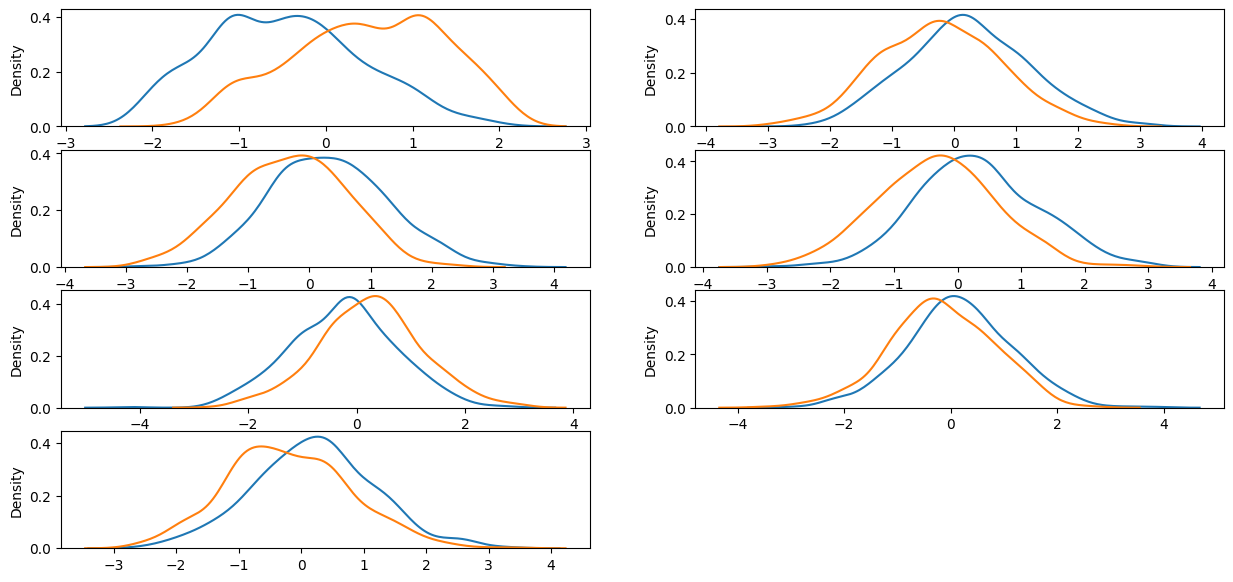

In [8]:
plt.figure(figsize=(15, 7))
for i in range(7):
    plt.subplot(4, 2, i + 1)
    sns.distplot(trainX[trainY == 1, i], hist=False, kde=True)
    sns.distplot(trainX[trainY == -1, i], hist=False, kde=True)
plt.show()

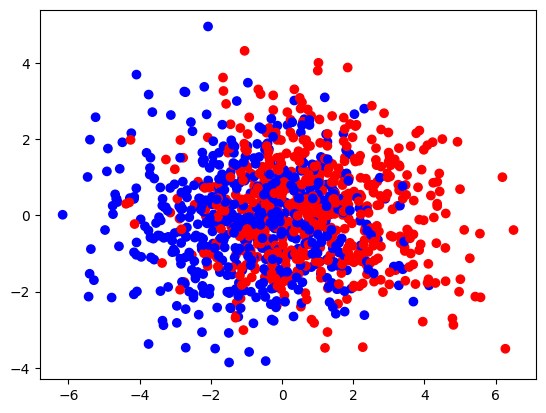

In [9]:
pca = PCA(n_components = 2)
projected_X = pca.fit_transform(trainX)
colors = ['r' if y == 1 else 'b' for y in trainY]
plt.scatter(projected_X[:,0], projected_X[:, 1], c = colors)

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [11]:
params= {'kernel':('rbf', 'linear'), 'C':[1, 10, 100, 1000, 10000], 'gamma': [0.01, 0.1, 1, 10, 100]}
svm = SVC()
grid_search_params(svm, trainX, trainY, params)

Searching Param Space
{'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}


In [12]:
svm = SVC(C=1000, gamma = 0.01, kernel = 'linear')
check_classifier(svm, trainX, trainY)

Cross-Validating model
[0.67256637 0.67256637 0.76106195 0.73451327 0.69911504 0.72321429
 0.66964286 0.6875     0.63392857 0.74107143]
Accuracy: 0.70 (+/- 0.04)




In [13]:
save_classifier(svm, trainX, trainY, name="svm.pkl")

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [15]:
lda_clf = LDA(priors=[0.5, 0.5])
check_classifier(lda_clf, trainX, trainY)

Cross-Validating model
[0.69026549 0.66371681 0.76106195 0.73451327 0.7079646  0.73214286
 0.66964286 0.69642857 0.66071429 0.75      ]
Accuracy: 0.71 (+/- 0.03)




In [16]:
save_classifier(lda_clf, trainX, trainY, name="lda.pkl")